In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G_konstanta = 6.67e-11 # SI (m^3 kg^-1 s^-2)

# parameter model sintetik
x0 = 400 # m
z0 = 300 # m
R = 250 # m
rho = 3000 # kg/m3

# variabel bebas x
x = np.arange(0,1001,20)

In [3]:
# fungsi forward modelling bola homogen
def f(x0, z0, R, rho):
    return G_konstanta*((4/3)*np.pi*(R**3)*z0*rho)/(((x-x0)**2+(z0**2))**(3/2))


# matriks kernel
G = np.column_stack([f(x0, z0, R, rho)])

# fungsi bola sphere
def bola_sphere(x0, z0, R):
    q = np.linspace(0,2*np.pi,1000)

    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)-z0
    
    return xSphere, zSphere

In [4]:
gz1 = f(x0, z0, R, rho)
xb1,yb1 = bola_sphere(x0, z0, R)

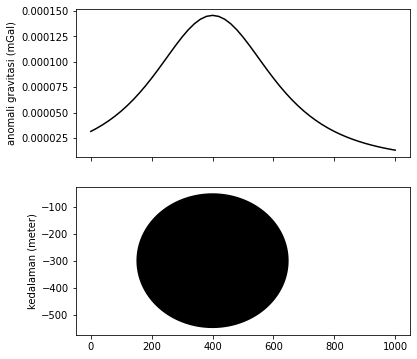

In [5]:
# plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,6))

ax1.plot(x,gz1,'k')
ax1.set_ylabel("anomali gravitasi (mGal)")

ax2.fill(xb1,yb1,'k')
ax2.set_ylabel("kedalaman (meter)")
plt.show()

In [6]:
rho_est = np.arange(1000,5000,100)

err = np.zeros(len(rho_est))

gz_calc =  [[0 for i in range(len(x))] for i in range(len(rho_est))]


for i in range(len(rho_est)):
    for j in range(len(x)):
        gz_calc[i][j] = G_konstanta*((4/3)*np.pi*(250**3)*300*rho_est[i])/(((x[j]-400)**2+(300**2))**(3/2))
    err[i] = np.sum((gz1 - gz_calc[i])**2)

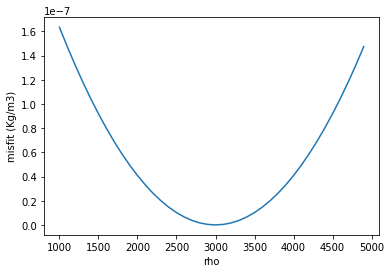

In [7]:
plt.plot(rho_est,err)

plt.xlabel("rho")
plt.ylabel("misfit (Kg/m3)")
plt.show()

In [8]:
len(gz_calc)

40